f_N(x) =
 N       
2 ⋅log(x)
─────────
 N⋅log(2)

Dérivée f'_N(x) =
     N    
    2     
──────────
N⋅x⋅log(2)

Zéros de f(x) :
[1]

Zéros de f'(x) (candidats aux extremas de f) :
[]

g_N(x) = f_N(x) - x =
 N           
2 ⋅log(x)    
───────── - x
 N⋅log(2)    

Dérivée g'_N(x) =
     N        
    2         
────────── - 1
N⋅x⋅log(2)    

Zéros de g(x) :
⎡  N  ⎛  -N         ⎞ ⎤
⎢-2 ⋅W⎝-2  ⋅N⋅log(2)⎠ ⎥
⎢─────────────────────⎥
⎣       N⋅log(2)      ⎦

Zéros de g'(x) (candidats aux extremas de g) :
⎡    N   ⎤
⎢   2    ⎥
⎢────────⎥
⎣N⋅log(2)⎦


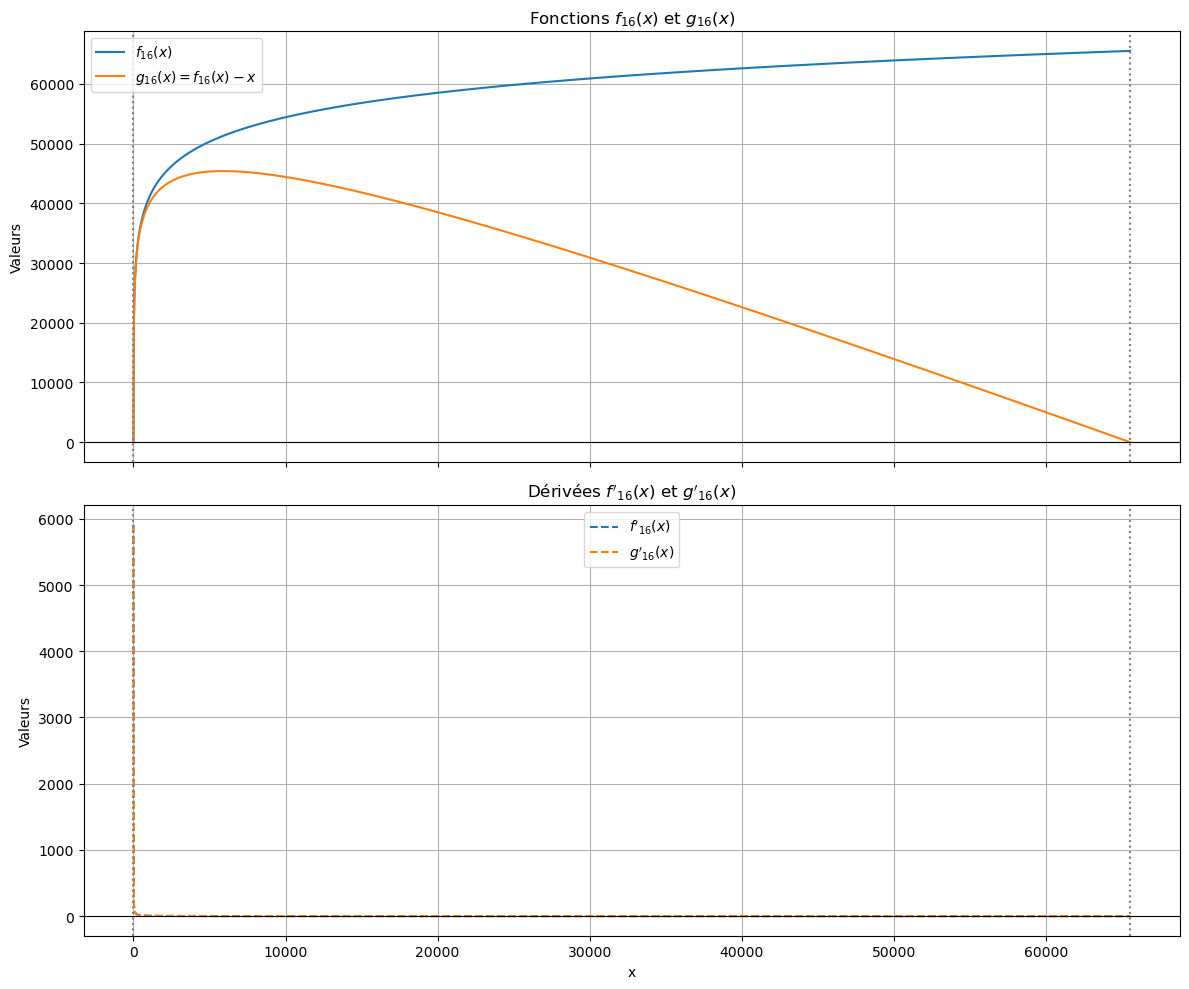

In [6]:
# Import des bibliothèques
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Définition des variables symboliques
x, N = sp.symbols('x N', positive=True)

# Définition de la fonction f_N(x) = (2^N / N) * log2(x)
f = (2**N / N) * sp.log(x, 2)

# Définir g_N(x) = f(x) - x
g = f - x

# --- Dérivées ---
f_prime = sp.diff(f, x)
g_prime = sp.diff(g, x)

# --- Zéros ---
zeros_f = sp.solve(sp.Eq(f, 0), x)
zeros_fprime = sp.solve(sp.Eq(f_prime, 0), x)
zeros_g = sp.solve(sp.Eq(g, 0), x)
zeros_gprime = sp.solve(sp.Eq(g_prime, 0), x)

# --- Simplifications ---
f_simpl = sp.simplify(f)
f_prime_simpl = sp.simplify(f_prime)
g_simpl = sp.simplify(g)
g_prime_simpl = sp.simplify(g_prime)

print("f_N(x) =")
sp.pprint(f_simpl)

print("\nDérivée f'_N(x) =")
sp.pprint(f_prime_simpl)

print("\nZéros de f(x) :")
sp.pprint(zeros_f)

print("\nZéros de f'(x) (candidats aux extremas de f) :")
sp.pprint(zeros_fprime)

print("\ng_N(x) = f_N(x) - x =")
sp.pprint(g_simpl)

print("\nDérivée g'_N(x) =")
sp.pprint(g_prime_simpl)

print("\nZéros de g(x) :")
sp.pprint(zeros_g)

print("\nZéros de g'(x) (candidats aux extremas de g) :")
sp.pprint(zeros_gprime)

# --- Partie numérique pour N=16 ---
N_val = 16
f_num = sp.lambdify(x, f.subs(N, N_val), "numpy")
fprime_num = sp.lambdify(x, f_prime.subs(N, N_val), "numpy")
g_num = sp.lambdify(x, g.subs(N, N_val), "numpy")
gprime_num = sp.lambdify(x, g_prime.subs(N, N_val), "numpy")

# Intervalle d'étude
X = np.linspace(1, 2**N_val, 2000)
Yf = f_num(X)
Yfp = fprime_num(X)
Yg = g_num(X)
Ygp = gprime_num(X)

# --- Tracé séparé ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Partie 1 : f et g
ax1.plot(X, Yf, label=r"$f_{16}(x)$")
ax1.plot(X, Yg, label=r"$g_{16}(x)=f_{16}(x)-x$")
ax1.axhline(0, color="black", linewidth=0.8)
ax1.axvline(1, color="gray", linestyle=":")
ax1.axvline(2**N_val, color="gray", linestyle=":")
ax1.set_title("Fonctions $f_{16}(x)$ et $g_{16}(x)$")
ax1.set_ylabel("Valeurs")
ax1.legend()
ax1.grid(True)

# Partie 2 : f' et g'
ax2.plot(X, Yfp, "--", label=r"$f'_{16}(x)$")
ax2.plot(X, Ygp, "--", label=r"$g'_{16}(x)$")
ax2.axhline(0, color="black", linewidth=0.8)
ax2.axvline(1, color="gray", linestyle=":")
ax2.axvline(2**N_val, color="gray", linestyle=":")
ax2.set_title("Dérivées $f'_{16}(x)$ et $g'_{16}(x)$")
ax2.set_xlabel("x")
ax2.set_ylabel("Valeurs")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

N = 16
Interval: a = 5909.278887, b = 65536.000000
Affine fit: m = -0.799598888644, c = 53876.9499845
L2 error (sqrt integral (g-(mx+c))^2) ≈ 244270.918408
Max absolute error on sampled grid ≈ 3743.34897731



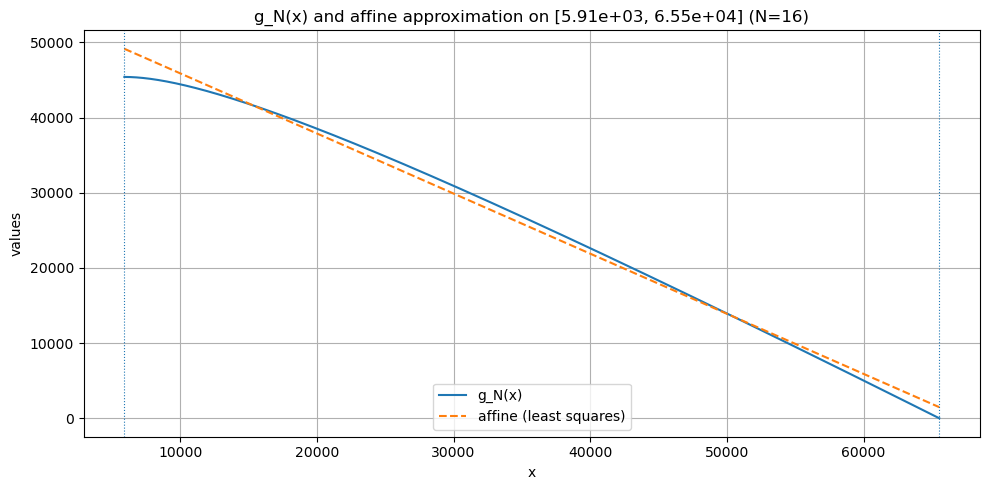

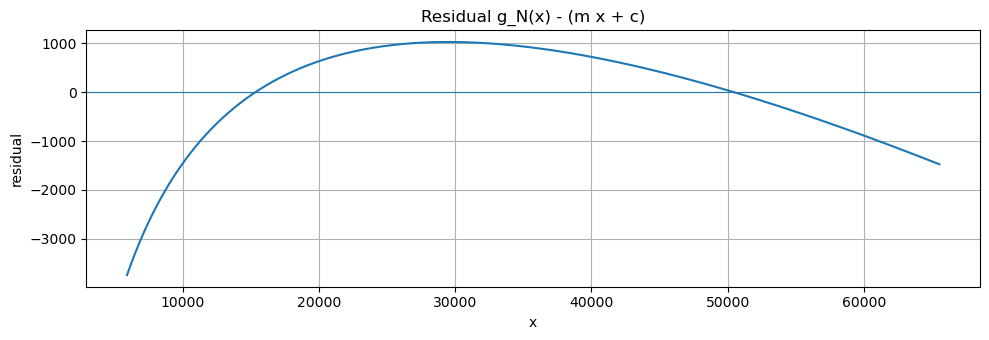

{'N': 16,
 'a': 5909.278887481194,
 'b': 65536,
 'm': -0.7995988886441983,
 'c': 53876.94998452922,
 'L2': 244270.918407978,
 'max_abs_err': 3743.3489773095353,
 'X': array([ 5909.27888748,  5916.7331594 ,  5924.18743133, ...,
        65521.09145615, 65528.54572808, 65536.        ]),
 'g': array([4.54085482e+04, 4.54085435e+04, 4.54085294e+04, ...,
        1.35641108e+01, 6.78209362e+00, 0.00000000e+00]),
 'line': array([49151.89715341, 49145.93672587, 49139.97629832, ...,
         1486.35807343,  1480.39764589,  1474.43721834]),
 'residual': array([-3743.34897731, -3737.39324742, -3731.44689706, ...,
        -1472.79396266, -1473.61555226, -1474.43721834])}

In [7]:
# Code to compute the best-fit affine approximation (least-squares on interval [a,b])
# for g_N(x) = (2^N/(N ln 2)) * ln(x) - x, and to plot results.
# It prints m, c, L2 error and max absolute error, and shows plots.
import numpy as np
import matplotlib.pyplot as plt
import math

def compute_affine_and_plot(N, num_points=8000, show_plot=True):
    # Define a and b
    a = (2**N) / (N * math.log(2))
    b = 2**N

    # define parameter A used in g_N (to avoid confusion with a)
    A = (2**N) / (N * math.log(2))  # equals a
    
    # symbolic/analytic integrals used to compute normal equations
    I0 = b - a
    I1 = (b**2 - a**2) / 2.0
    I2 = (b**3 - a**3) / 3.0

    # J0 = ∫ g(x) dx = A * (x ln x - x)|_a^b - x^2/2 |_a^b
    J0 = A * ((b * math.log(b) - b) - (a * math.log(a) - a)) - (b**2 - a**2) / 2.0

    # J1 = ∫ x g(x) dx = A * (x^2/2 (ln x - 1/2))|_a^b - x^3/3 |_a^b
    J1 = A * (0.5 * (b**2) * (math.log(b) - 0.5) - 0.5 * (a**2) * (math.log(a) - 0.5)) - (b**3 - a**3) / 3.0

    # Solve normal equations for m and c
    denom = I0 * I2 - I1**2
    m = (I0 * J1 - I1 * J0) / denom
    c = (J0 - m * I1) / I0

    # Numeric evaluation of errors on a grid
    X = np.linspace(a, b, num_points)
    # g_N(x): use natural log
    g = A * np.log(X) - X
    line = m * X + c
    residual = g - line

    # compute L2 error (sqrt of integral of residual^2)
    # approximate integral via trapezoidal rule
    L2_sq = np.trapz(residual**2, X)
    L2 = np.sqrt(L2_sq)

    # max absolute error on grid
    max_abs_err = np.max(np.abs(residual))

    # Print results
    print(f"N = {N}")
    print(f"Interval: a = {a:.6f}, b = {b:.6f}")
    print(f"Affine fit: m = {m:.12g}, c = {c:.12g}")
    print(f"L2 error (sqrt integral (g-(mx+c))^2) ≈ {L2:.12g}")
    print(f"Max absolute error on sampled grid ≈ {max_abs_err:.12g}")
    print("")

    if show_plot:
        # Plot 1: g and affine on same axes
        plt.figure(figsize=(10,5))
        plt.plot(X, g, label="g_N(x)")
        plt.plot(X, line, linestyle="--", label="affine (least squares)")
        plt.axvline(a, linestyle=":", linewidth=0.8)
        plt.axvline(b, linestyle=":", linewidth=0.8)
        plt.title(f"g_N(x) and affine approximation on [{a:.3g}, {b:.3g}] (N={N})")
        plt.xlabel("x")
        plt.ylabel("values")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot 2: residual
        plt.figure(figsize=(10,3.5))
        plt.plot(X, residual)
        plt.axhline(0, linewidth=0.8)
        plt.title("Residual g_N(x) - (m x + c)")
        plt.xlabel("x")
        plt.ylabel("residual")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Return numerical values for possible further use
    return {"N": N, "a": a, "b": b, "m": m, "c": c, "L2": L2, "max_abs_err": max_abs_err, "X": X, "g": g, "line": line, "residual": residual}

# Example run for N=16
res_N16 = compute_affine_and_plot(16, num_points=8000, show_plot=True)
res_N16

